<a href="https://colab.research.google.com/github/NWooster/SatelliteImages/blob/main/Satellite_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# https://www.kaggle.com/code/arpandhatt/satellite-image-classification/notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imshow

# NN
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# use the test set as training as the training set was too large
x_data_set_fpath = '/content/drive/MyDrive/Colab Notebooks/Satellite_example/Data/Testing/X_test_sat4.csv/X_test_sat4.csv'
y_data_set_fpath = '/content/drive/MyDrive/Colab Notebooks/Satellite_example/Data/Testing/y_test_sat4.csv'

X_data = pd.read_csv(x_data_set_fpath)
Y_data = pd.read_csv(y_data_set_fpath)


In [6]:
# convert pd data frame to numpy array
X_data_array = X_data.to_numpy()
Y_data_array = Y_data.to_numpy()


In [7]:
print ('We have',X_data_array.shape[0],'examples and each example is a list of',X_data_array.shape[1],'numbers with',Y_data_array.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


In [8]:
# reshape list of number array to a each being an image 28x28x4
X_data_img = X_data_array.reshape([99999,28,28,4]).astype(float)

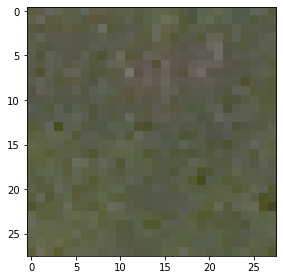

Grassland


In [9]:
ix = 3 # type a number between 0 and 99,999 inclusive to select an image
image_shown = np.array(X_data_img[ix,:,:,0:3], dtype=np.uint8)

# plot image
imshow(image_shown) # only seeing the RGB channels
plt.show()

# tells what the image is using y_data
if Y_data_array[ix,0] == 1:
    print ('Barren Land')
elif Y_data_array[ix,1] == 1:
    print ('Trees')
elif Y_data_array[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [10]:
# use simple NN network
model = Sequential([Dense(4, input_shape=(3136,), activation='softmax')])

In [11]:
# normalise data (simple way)
X_data_array = X_data_array/255

In [12]:
# train model (epochs should be 5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_data_array,Y_data_array,batch_size=32, epochs=1, verbose=1, validation_split=0.01)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12548     
                                                                 
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
3094/3094 [==============================] - 7s 2ms/step - loss: 0.7580 - accuracy: 0.6858 - val_loss: 0.6513 - val_accuracy: 0.7240


In [24]:
# use one of the data used to train to test (very bad!) select last 1000 ones
predictions = model.predict(X_data_array[-1000:], verbose=1)

32/32 [==============================] - 0s 1ms/step


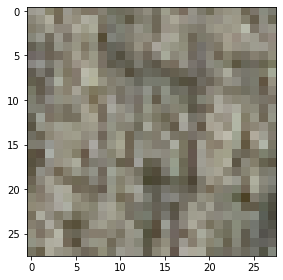

[0.01898813 0.0678055  0.42067716 0.4925291 ]
Prediction:
1.9% probability barren land,
6.8% probability trees,
42.1% probability grassland,
49.3% probability other

Ground Truth: Other


In [37]:
ix = 999 # type a number to predict that image
image_shown = np.array(X_data_img[99999-(1000-ix),:,:,0:3], dtype=np.uint8)
imshow(image_shown) # only seeing the RGB channels
plt.show()

# predict what the image is
print(predictions[ix])
print('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(predictions[ix,0]*100,predictions[ix,1]*100,predictions[ix,2]*100,predictions[ix,3]*100))

# print ground truth
print ('Ground Truth: ',end='')
if Y_data_array[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_data_array[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_data_array[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')